# Kickstarter Campaign Analysis

- What's the best length of time to run a campaign?
- What's the ideal pledge goal?
- What type of projects would be most successful at getting funded?
- Is there an ideal month/day/time to launch a campaign?

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
print("Setup Complete")

Setup Complete


In [2]:
kickstarter = pd.read_csv("DSI_kickstarterscrape_dataset.csv", index_col="project id", encoding='Latin-1', parse_dates=["funded date"])

In [3]:
kickstarter.info()
kickstarter.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45957 entries, 39409 to 2147460119
Data columns (total 16 columns):
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null datetime64[ns]
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(7)
memory usage: 6.0+ MB


,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,2012-06-08 00:00:31,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,6,"$10,$25,$50,$100,$150,$250",2,0,30.00


### Update column names
- convert to camel case
- specify `goal` and `pledged` are in USD
- specify `duration` is in days

In [4]:
# list exisitng columns
kickstarter.columns

Index(['name', 'url', 'category', 'subcategory', 'location', 'status', 'goal',
       'pledged', 'funded percentage', 'backers', 'funded date', 'levels',
       'reward levels', 'updates', 'comments', 'duration'],
      dtype='object')

In [5]:
kickstarter.columns = [
    'name', 
    'url', 
    'category', 
    'subcategory', 
    'location', 
    'status', 
    'goal_usd', 
    'pledged_usd', 
    'funded_percentage', 
    'backers',
    'funded_date',
    'levels',
    'reward_levels',
    'updates',
    'comments',
    'duration_days'
]

kickstarter.head()

,name,url,category,subcategory,location,status,goal_usd,pledged_usd,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration_days
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,2012-06-08 00:00:31,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,6,"$10,$25,$50,$100,$150,$250",2,0,30.00


### Calculate Launched Day of Week

In [6]:
# Storing duration as timedelta
kickstarter['duration_days'] = pd.to_timedelta(kickstarter['duration_days'], unit='D')

In [7]:
kickstarter.info()
kickstarter.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45957 entries, 39409 to 2147460119
Data columns (total 16 columns):
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal_usd             45957 non-null float64
pledged_usd          45945 non-null float64
funded_percentage    45957 non-null float64
backers              45957 non-null int64
funded_date          45957 non-null datetime64[ns]
levels               45957 non-null int64
reward_levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration_days        45957 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(7), timedelta64[ns](1)
memory usage: 6.0+ MB


,name,url,category,subcategory,location,status,goal_usd,pledged_usd,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration_days
project id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30 days 00:00:00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,2010-08-02 03:59:00,5,"$1,$5,$10,$25,$50",6,0,47 days 04:19:12
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,2012-06-08 00:00:31,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28 days 00:00:00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32 days 05:16:48
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,2011-06-01 15:25:39,6,"$10,$25,$50,$100,$150,$250",2,0,30 days 00:00:00


In [8]:
kickstarter["launched_date"] = kickstarter['funded_date'] -  kickstarter['duration_days']

In [9]:
kickstarter["launched_day_of_week"] = kickstarter['launched_date'].dt.dayofweek

In [10]:
kickstarter["launched_day_of_week"].value_counts(normalize="True").sort_values()

6    0.070414
5    0.095850
0    0.153143
4    0.155711
2    0.171922
3    0.174946
1    0.178014
Name: launched_day_of_week, dtype: float64

### Consolidating Film & Video category

In [11]:
kickstarter["category"].value_counts()

Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: category, dtype: int64

notice that `Film & Video` is also labeled as `Film &amp; Video`

In [12]:
# rename `Film &amp; Video` -> `Film & Video`
kickstarter.loc[kickstarter['category'] == 'Film &amp; Video', 'category'] = "Film & Video"

# confirm that the Film & Video columns have been consolidated
kickstarter["category"].value_counts()

Film & Video    13551
Music           10913
Publishing       4770
Art              3992
Theater          2492
Design           1768
Games            1738
Photography      1514
Food             1439
Fashion          1136
Comics           1072
Technology        811
Dance             761
Name: category, dtype: int64

### Delete Duplicates

In [13]:
# find duplicated rows
duplicates = kickstarter.duplicated()
kickstarter[duplicates].head()

,name,url,category,subcategory,location,status,goal_usd,pledged_usd,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration_days,launched_date,launched_day_of_week
project id,,,,,,,,,,,,,,,,,,
2140333236,Imagined Family Heirlooms: An Archive of Inher...,http://www.kickstarter.com/projects/andersonst...,Photography,Photography,"Little Rock, AR",successful,5800.0,8521.0,1.469138,110,2011-07-29 00:53:53,16,"$10,$20,$35,$50,$75,$100,$150,$200,$225,$300,$...",5,4,67 days 00:00:00,2011-05-23 00:53:53,0
2140344109,Help Fund Thana Alexa's Debut Album &quot;Ode ...,http://www.kickstarter.com/projects/1024906052...,Music,Jazz,"New York, NY",successful,15000.0,16678.0,1.111867,142,2012-05-20 20:36:57,16,"$1,$5,$10,$15,$25,$50,$75,$100,$200,$250,$300,...",5,2,32 days 00:00:00,2012-04-18 20:36:57,2
2140513451,The Cookie Chew - Changing the Way We Eat a Co...,http://www.kickstarter.com/projects/1650956569...,Food,Food,"San Diego, CA",successful,4500.0,5540.0,1.231111,89,2010-08-24 04:43:00,5,"$10,$50,$75,$100,$500",14,17,43 days 06:28:48,2010-07-11 22:14:12,6
2140547791,Ant Invasion iPhone Game App,http://www.kickstarter.com/projects/antinvasio...,Games,Video Games,"Burlington, NJ",failed,5000.0,0.0,0.000000,0,2011-09-19 19:08:43,7,"$1,$5,$10,$20,$50,$100,$500",1,0,45 days 00:00:00,2011-08-05 19:08:43,4
2140567876,THE HUAORANI: Savages of Oriente/Protectors of...,http://www.kickstarter.com/projects/34840787/t...,Film & Video,Documentary,"Astoria, NY",successful,5000.0,5730.0,1.146000,85,2011-07-05 03:59:00,11,"$10,$25,$30,$50,$75,$100,$250,$500,$1,000,$2,0...",9,4,48 days 08:09:36,2011-05-17 19:49:24,1


In [14]:
# remove duplicated rows
kickstarter = kickstarter.drop_duplicates()

### Limiting scope to completed projects

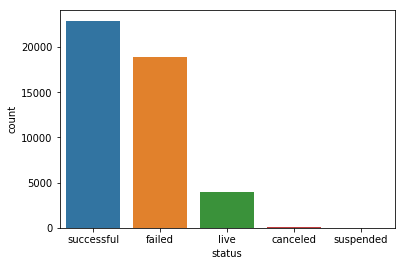

In [15]:
# evaluating different statuses of campaigns
ax = sns.countplot(x="status", data=kickstarter)

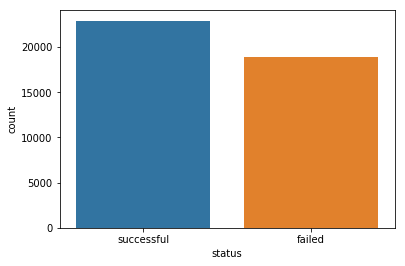

In [16]:
# focus only on completed campaigns 
kickstarter = kickstarter[(kickstarter['status'] == 'successful')|(kickstarter['status'] == 'failed')]
ax = sns.countplot(x="status", data=kickstarter)

In [17]:
kickstarter['status'].value_counts(normalize="True")

successful    0.54739
failed        0.45261
Name: status, dtype: float64

**45%** of Kickstarter campaigns fail

In [18]:
kickstarter = kickstarter.drop([
    'name',
    'subcategory', 
    'location', 
    'pledged_usd', 
    'funded_percentage', 
    'backers',
    'funded_date', 
    'levels', 
    'reward_levels',
    'launched_date',
    'updates',
    'comments'
], axis=1)


In [19]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41844 entries, 39409 to 2147460119
Data columns (total 6 columns):
url                     41844 non-null object
category                41844 non-null object
status                  41844 non-null object
goal_usd                41844 non-null float64
duration_days           41844 non-null timedelta64[ns]
launched_day_of_week    41844 non-null int64
dtypes: float64(1), int64(1), object(3), timedelta64[ns](1)
memory usage: 3.5+ MB


## Analysis

In [20]:
kickstarter.groupby("status").describe()

duration_days                                                    \
                   count                     mean                      std   
status                                                                       
failed             18939  42 days 23:28:18.506573  18 days 16:55:34.845298   
successful         22905  37 days 23:06:10.703339  16 days 15:36:07.563353   

                                                                 \
                        min               25%               50%   
status                                                            
failed      1 days 00:00:00  30 days 00:00:00  36 days 00:00:00   
successful  1 days 00:00:00  30 days 00:00:00  31 days 00:00:00   

                                               goal_usd               ...   \
                         75%               max    count          mean ...    
status                                                                ...    
failed      59 days 21:00:00  91 days 23:02:24  18939.0  16365.162204 ...    
successful  45 days 00:00:00  91 days 23:02:24  22905.0   5486.653261 ...    

                                 launched_day_of_week                      \
                75%          max                count      mean       std   
status                                                                      
failed      12000.0  21474836.47              18939.0  2.638576  1.831379   
successful   6000.0    900000.00              22905.0  2.527352  1.809099   

                                     
            min  25%  50%  75%  max  
status                               
failed      0.0  1.0  3.0  4.0  6.0  
successful  0.0  1.0  2.0  4.0  6.0  

[2 rows x 24 columns]

In [21]:
successful_campaigns = kickstarter[kickstarter["status"] == "successful"]
failed_campaigns = kickstarter[kickstarter["status"] == "failed"]

### Duration

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


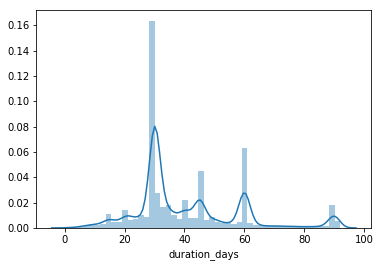

In [22]:
# all campaigns
sns.distplot(kickstarter['duration_days'].astype('timedelta64[h]') / 24)

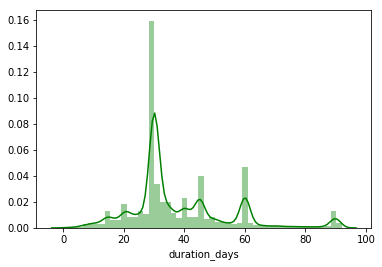

In [26]:
# successful_campaigns
sns.distplot(successful_campaigns['duration_days'].astype('timedelta64[h]') / 24, color ="g")

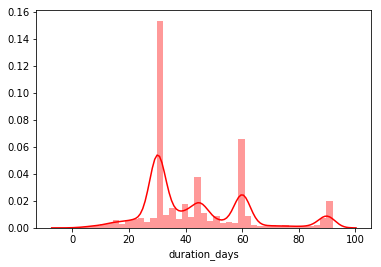

In [25]:
# failed_campaigns
sns.distplot(failed_campaigns['duration_days'].astype('timedelta64[h]') / 24, color="r")

### Goal

In [36]:
kickstarter.groupby('status').mean()

,goal_usd,launched_day_of_week
status,,
failed,16365.162204,2.638576
successful,5486.653261,2.527352
